<a href="https://colab.research.google.com/github/anilkumargangadhara09/GenAI-ML/blob/main/Marketing_Campaigns_CEP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Marketing Campaigns

**Problem scenario:**

Marketing mix stands as a widely utilized concept in the execution of marketing
strategies. It encompasses various facets within a comprehensive marketing plan,
with a central focus on the four Ps of marketing: product, price, place, and
promotion.

**Problem objective:**

As a data scientist, you must conduct exploratory data analysis and hypothesis
testing to enhance your comprehension of the diverse factors influencing customer
acquisition.

**Data description:**

The variables such as birth year, education, income, and others pertain to the first
'P' or 'People' in the tabular data presented to the user. The expenditures on items
like wine, fruits, and gold, are associated with ‘Product’. Information relevant to
sales channels, such as websites and stores, is connected to ‘Place’, and the fields
discussing promotions and the outcomes of various campaigns are linked to
‘Promotion’.



###import required libraries

In [ ]:
# Importing Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import (
    accuracy_score,
    roc_auc_score, # Import roc_auc_score
    confusion_matrix, roc_curve,
    classification_report,
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
    r2_score,
    roc_curve,
    f1_score,
)

# Warnings Library
import warnings                      # Main Library
warnings.filterwarnings("ignore")    # Suppressing All Warnings

### importing the data

In [ ]:
df = pd.read_csv('/content/marketing_data.csv')
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US


### Exploratory Data Analysis (EDA)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [ ]:
print(df[['Dt_Customer', ' Income ']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Dt_Customer  2240 non-null   object
 1    Income      2216 non-null   object
dtypes: object(2)
memory usage: 35.1+ KB
None


Both columns are currently of object type. there is a leading space in the column name ' Income ', so removing the leading space.
converting Dt_Customer to datetime objects and Income to numerical values

In [ ]:
# Handle the leading space in the column name
df.rename(columns={' Income ': 'Income'}, inplace=True)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA


### Task 2

There are missing income values for some customers. Conduct missing value
imputation, considering that customers with similar education and marital
status tend to have comparable yearly incomes, on average. It may be
necessary to cleanse the data before proceeding. Specifically, scrutinize the
categories of education and marital status for data cleaning.

In [ ]:
#unique values in Education
print(f'Unique values in Education: {df["Education"].unique()}')
#unique values in Marital_Status
print(f'Unique values in Marital_Status: {df["Marital_Status"].unique()}')


Unique values in Education: ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
Unique values in Marital_Status: ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']


'YOLO' 'Alone' 'Absurd' Group all these status into Unusual

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace(['YOLO', 'Alone', 'Absurd'], 'Unusual')
print(f'Unique values in Marital_Status: {df["Marital_Status"].unique()}')

Unique values in Marital_Status: ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'Unusual']


In [ ]:
# Convert 'Income' to numeric, coercing errors
df['Income'] = df['Income'].astype(str).str.replace(r'[$,]', '', regex=True)
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')

# Verify if there are any remaining missing values in 'Income'
print("Missing values in 'Income' before imputation:", df['Income'].isnull().sum())

mean_income_by_group = df.groupby(['Education', 'Marital_Status'])['Income'].transform('mean')

print(f'mean_income_by_group: {mean_income_by_group}\n')

df['Income'].fillna(mean_income_by_group, inplace=True)

# Verify if there are any remaining missing values in 'Income'
print("Missing values in 'Income' after imputation:", df['Income'].isnull().sum())

Missing values in 'Income' before imputation: 24
mean_income_by_group: 0       54526.042017
1       51322.182927
2       50800.258741
3       55758.480702
4       51322.182927
            ...     
2235    53096.615385
2236    46201.100000
2237    54526.042017
2238    50800.258741
2239    58138.031579
Name: Income, Length: 2240, dtype: float64

Missing values in 'Income' after imputation: 0


### Task 3




1.   Create variables to represent the total number of children, age, and totalspending
2.   Derive the total purchases from the number of transactions across the
three channels.



In [ ]:
#create variable to store total num of chidren, age m totalspending
df['Total_Children'] = df['Kidhome'] + df['Teenhome']
current_year = 2025
df['Age'] = current_year - df['Year_Birth']
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spending_cols].sum(axis=1)

# Derive the total purchases from the number of transactions across the three channels.
transaction_channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['Total_Purchases'] = df[transaction_channels].sum(axis=1)
# df['Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Children,Age,Total_Spending,Total_Purchases
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,1,0,SP,0,55,1190,14
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,1,1,0,CA,0,64,577,17
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,US,1,67,251,10


### UDF

In [ ]:
# To determine the threshold value for outliers
# with default low_q = 0.05 and upper_q = 0.95
def outliers_threshold(data, variable, low_quantile=0.05, up_quantile=0.95):
    q1 = data[variable].quantile(low_quantile) #quartile1
    q3  = data[variable].quantile(up_quantile) #quartile3
    IQR = q3 - q1
    up_limit = q3 + 1.5 * IQR
    low_limit = q1 - 1.5 * IQR
    outlier_threshold = [low_limit, up_limit]
    return low_limit, up_limit
#

In [ ]:
#check - Are there any outliers in the variables
def has_outliers(df, numeric_columns, plot=False, removeOutliers=False):
    total = len(numeric_columns)
    for col in numeric_columns:
        low_limit, up_limit = outliers_threshold(df, col, 0.15, 0.60)
        print(f'The {col} lowlimit is: {low_limit} uplimit is: {up_limit}')
        if df[(df[col] > up_limit) | (df[col] < low_limit)].any(axis=None):
            number_of_outliers = df[(df[col] > up_limit) | (df[col] < low_limit)].shape[0]
            print(f'The {col} variable has {number_of_outliers} outliers \n')
        else:
            print(f'The {col} variable has no outliers \n')

        if plot:
            plt.figure(figsize=(10, 4))
            plt.subplot(1, 2, 1) # Changed total/2 to 2
            sns.boxplot(df[col])
            plt.subplot(1, 2, 2)
            sns.histplot(data=df, x=col, kde=True)
            plt.show()

            # Adjust the spacing between plots
            plt.tight_layout()

        if removeOutliers:
            print(f'Removing {col}')
            df = df[(df[col] <= up_limit) & (df[col] >= low_limit)]
                # df = df[(df[col] <= up_limit) & (df[col] >= low_limit)]
                # print(f'removed')

    return df
#

### Task 4

Generate box plots and histograms to gain insights into the distributions and
identify outliers. Implement outlier treatment as needed

numeric_columns: ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Total_Children', 'Age', 'Total_Spending', 'Total_Purchases']
cate_cols: ['Education', 'Marital_Status', 'Country']
The ID lowlimit is: -5701.700000000001 uplimit is: 13934.3
The ID variable has no outliers 



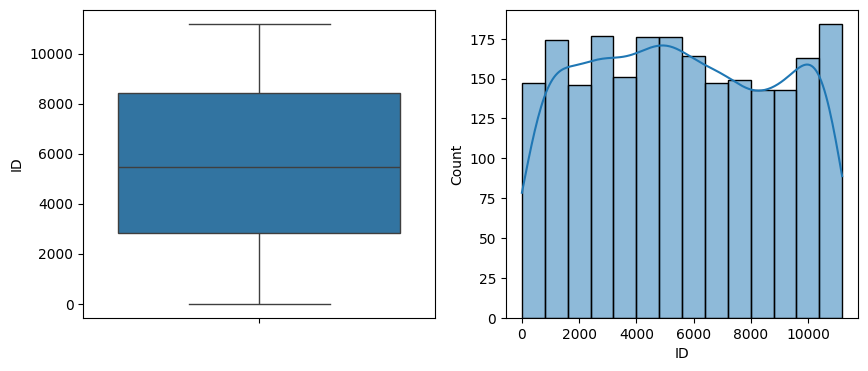

Removing ID
The Year_Birth lowlimit is: 1928.0 uplimit is: 2000.0
The Year_Birth variable has 3 outliers 



<Figure size 640x480 with 0 Axes>

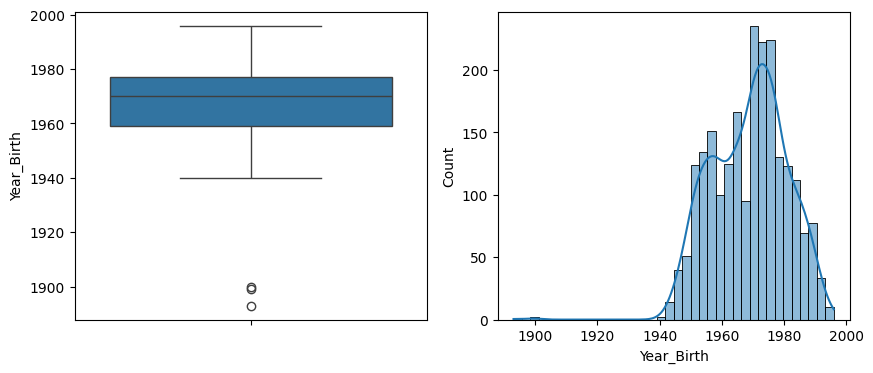

Removing Year_Birth
The Income lowlimit is: -16158.118947368406 uplimit is: 102791.53157894735
The Income variable has 10 outliers 



<Figure size 640x480 with 0 Axes>

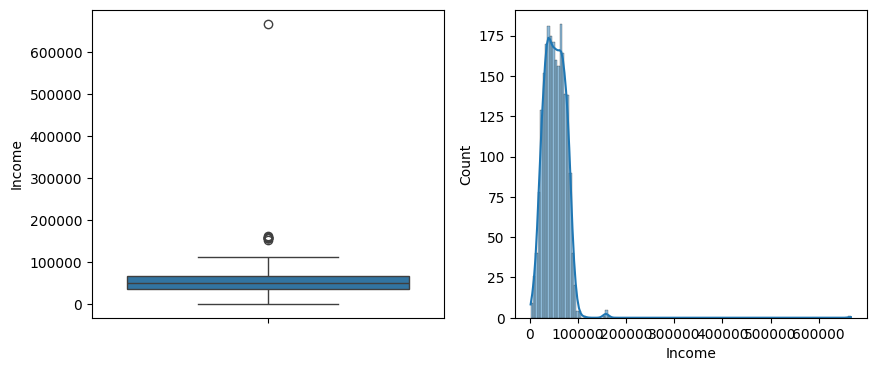

Removing Income
The Kidhome lowlimit is: -1.5 uplimit is: 2.5
The Kidhome variable has no outliers 



<Figure size 640x480 with 0 Axes>

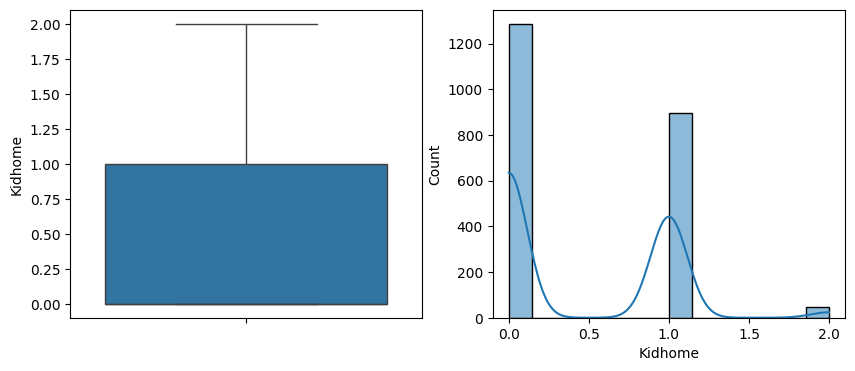

Removing Kidhome
The Teenhome lowlimit is: -1.5 uplimit is: 2.5
The Teenhome variable has no outliers 



<Figure size 640x480 with 0 Axes>

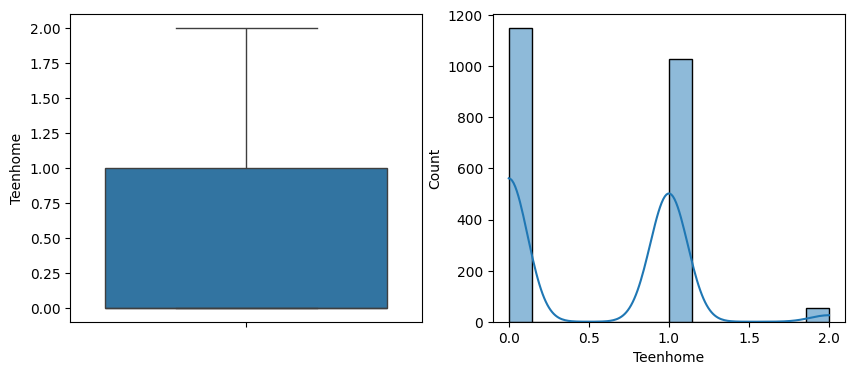

Removing Teenhome
The Recency lowlimit is: -53.75000000000006 uplimit is: 126.65000000000003
The Recency variable has no outliers 



<Figure size 640x480 with 0 Axes>

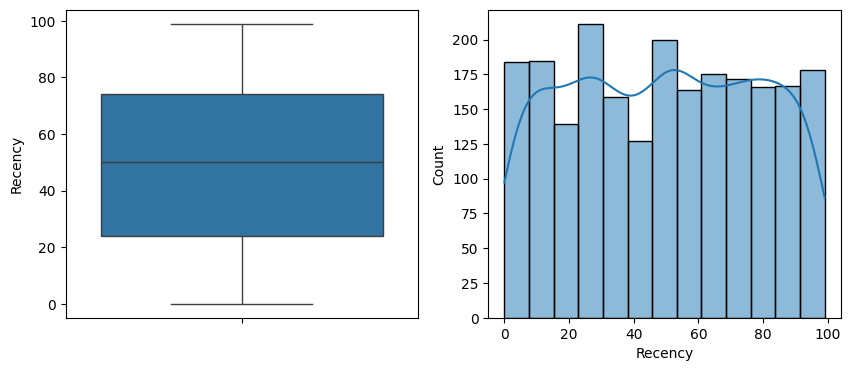

Removing Recency
The MntWines lowlimit is: -408.39999999999986 uplimit is: 709.9999999999998
The MntWines variable has 322 outliers 



<Figure size 640x480 with 0 Axes>

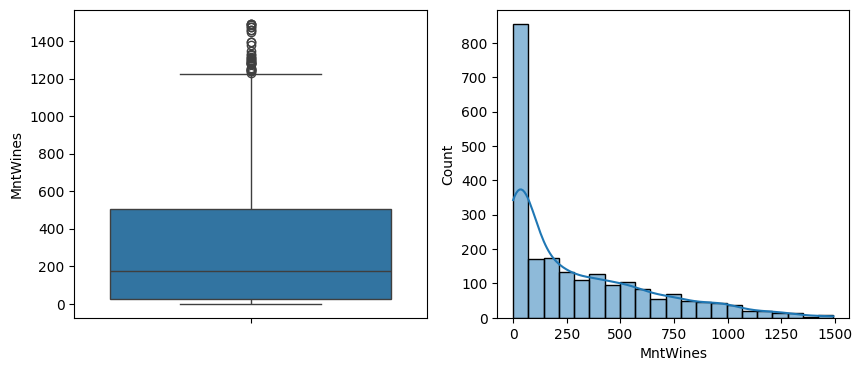

Removing MntWines
The MntFruits lowlimit is: -15.0 uplimit is: 25.0
The MntFruits variable has 472 outliers 



<Figure size 640x480 with 0 Axes>

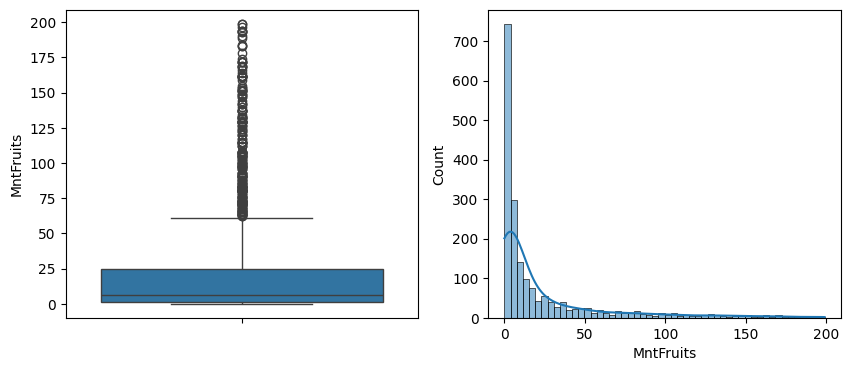

Removing MntFruits
The MntMeatProducts lowlimit is: -32.0 uplimit is: 72.0
The MntMeatProducts variable has 336 outliers 



<Figure size 640x480 with 0 Axes>

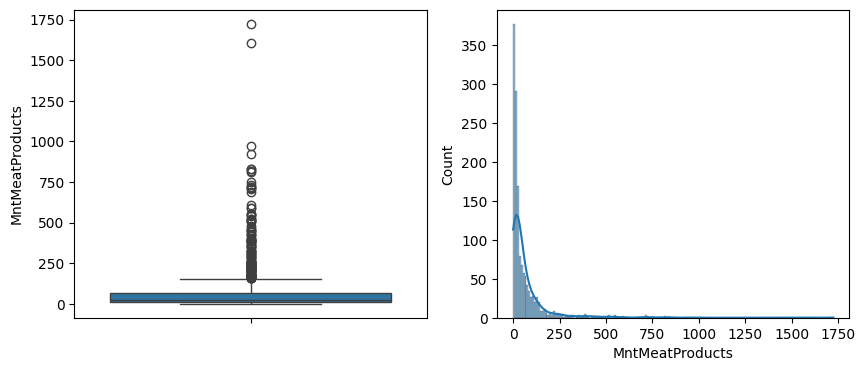

Removing MntMeatProducts
The MntFishProducts lowlimit is: -6.0 uplimit is: 10.0
The MntFishProducts variable has 219 outliers 



<Figure size 640x480 with 0 Axes>

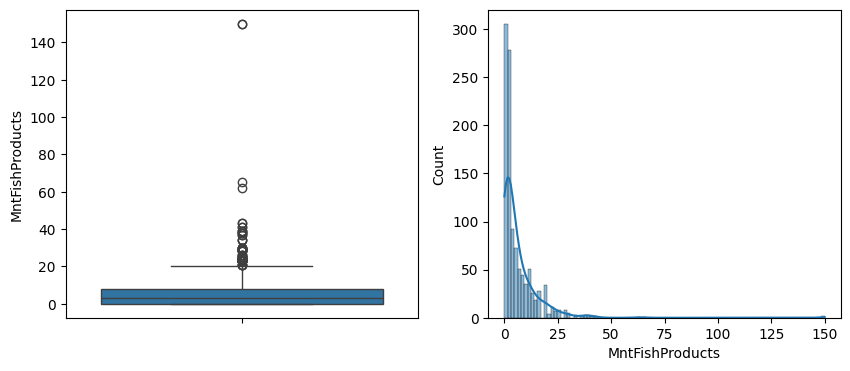

Removing MntFishProducts
The MntSweetProducts lowlimit is: -3.0 uplimit is: 5.0
The MntSweetProducts variable has 171 outliers 



<Figure size 640x480 with 0 Axes>

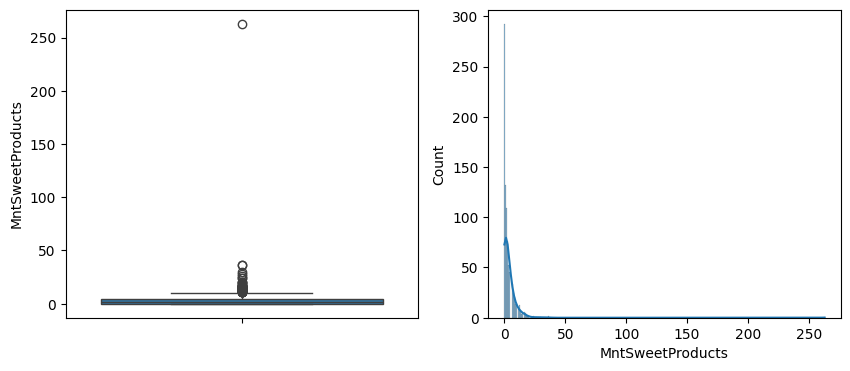

Removing MntSweetProducts
The MntGoldProds lowlimit is: -8.5 uplimit is: 19.5
The MntGoldProds variable has 137 outliers 



<Figure size 640x480 with 0 Axes>

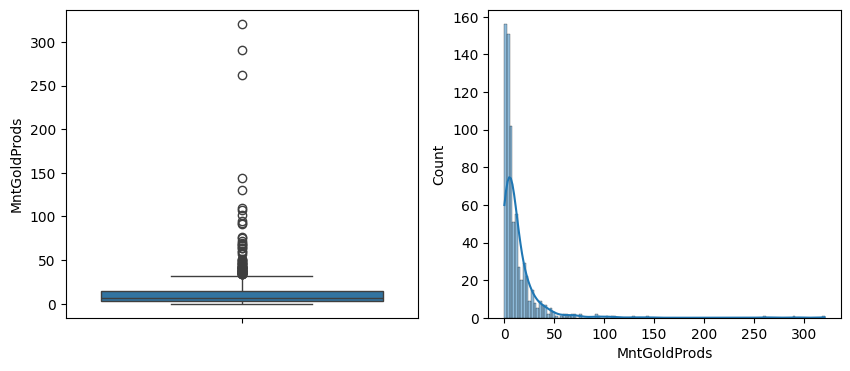

Removing MntGoldProds
The NumDealsPurchases lowlimit is: -0.5 uplimit is: 3.5
The NumDealsPurchases variable has 58 outliers 



<Figure size 640x480 with 0 Axes>

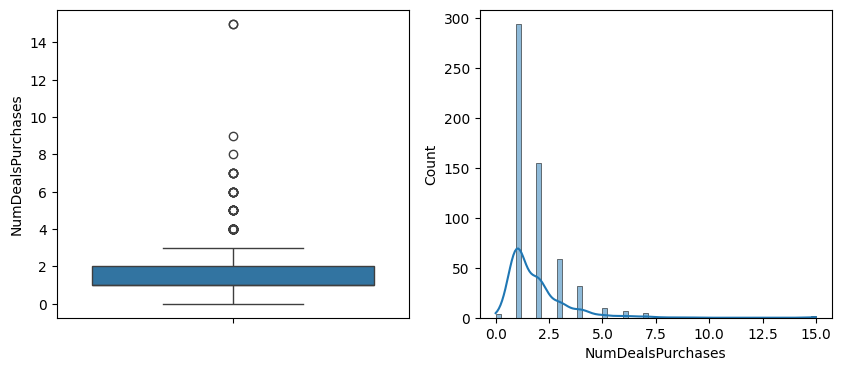

Removing NumDealsPurchases
The NumWebPurchases lowlimit is: 0.10000000000005116 uplimit is: 2.4999999999999147
The NumWebPurchases variable has 111 outliers 



<Figure size 640x480 with 0 Axes>

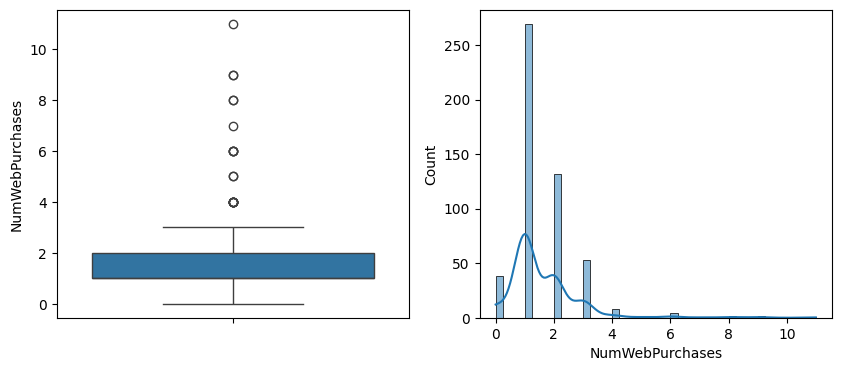

Removing NumWebPurchases
The NumCatalogPurchases lowlimit is: 0.0 uplimit is: 0.0
The NumCatalogPurchases variable has 74 outliers 



<Figure size 640x480 with 0 Axes>

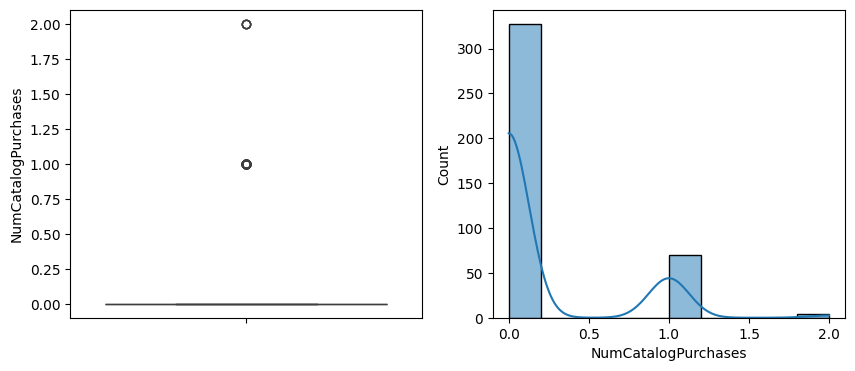

Removing NumCatalogPurchases
The NumStorePurchases lowlimit is: 0.5 uplimit is: 4.5
The NumStorePurchases variable has 2 outliers 



<Figure size 640x480 with 0 Axes>

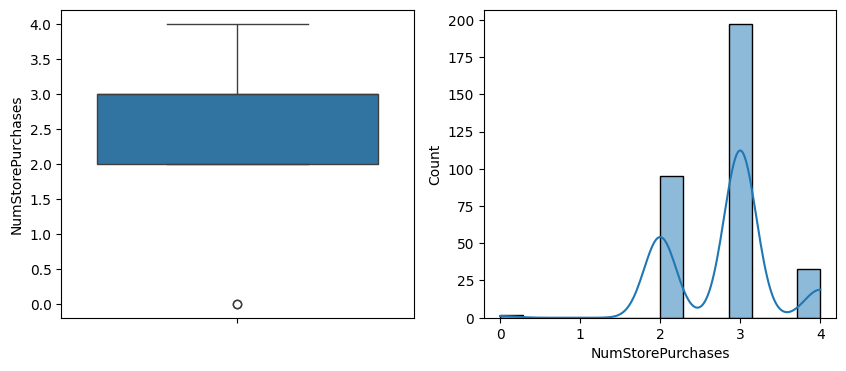

Removing NumStorePurchases
The NumWebVisitsMonth lowlimit is: 2.0 uplimit is: 10.0
The NumWebVisitsMonth variable has no outliers 



<Figure size 640x480 with 0 Axes>

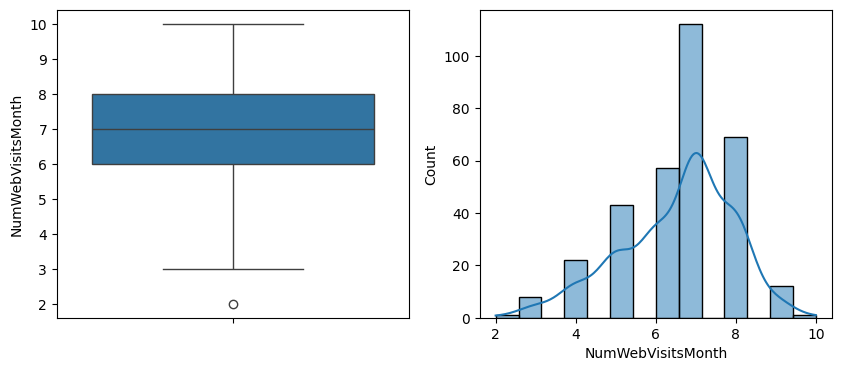

Removing NumWebVisitsMonth
The AcceptedCmp3 lowlimit is: 0.0 uplimit is: 0.0
The AcceptedCmp3 variable has 12 outliers 



<Figure size 640x480 with 0 Axes>

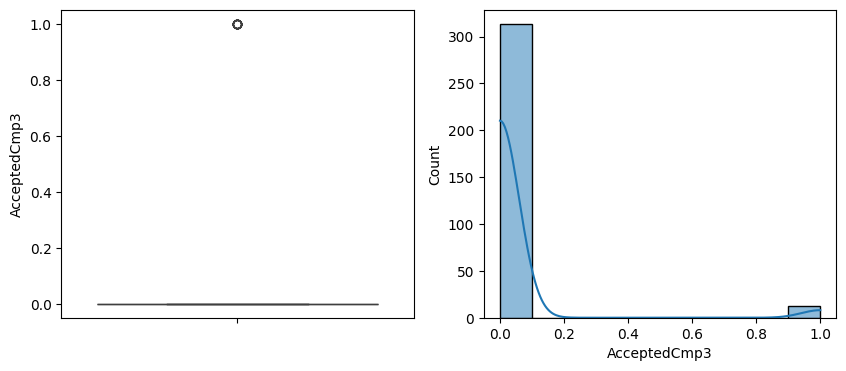

Removing AcceptedCmp3
The AcceptedCmp4 lowlimit is: 0.0 uplimit is: 0.0
The AcceptedCmp4 variable has 2 outliers 



<Figure size 640x480 with 0 Axes>

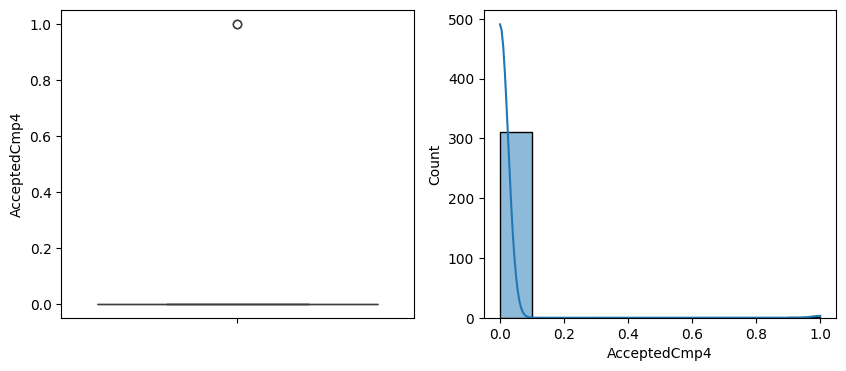

Removing AcceptedCmp4
The AcceptedCmp5 lowlimit is: 0.0 uplimit is: 0.0
The AcceptedCmp5 variable has no outliers 



<Figure size 640x480 with 0 Axes>

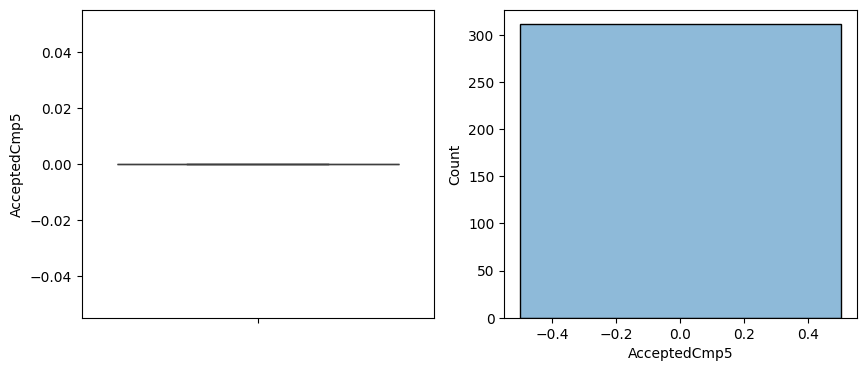

Removing AcceptedCmp5
The AcceptedCmp1 lowlimit is: 0.0 uplimit is: 0.0
The AcceptedCmp1 variable has no outliers 



<Figure size 640x480 with 0 Axes>

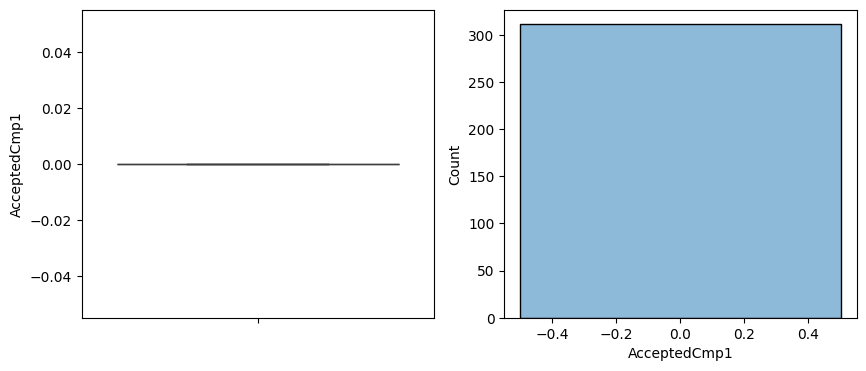

Removing AcceptedCmp1
The AcceptedCmp2 lowlimit is: 0.0 uplimit is: 0.0
The AcceptedCmp2 variable has no outliers 



<Figure size 640x480 with 0 Axes>

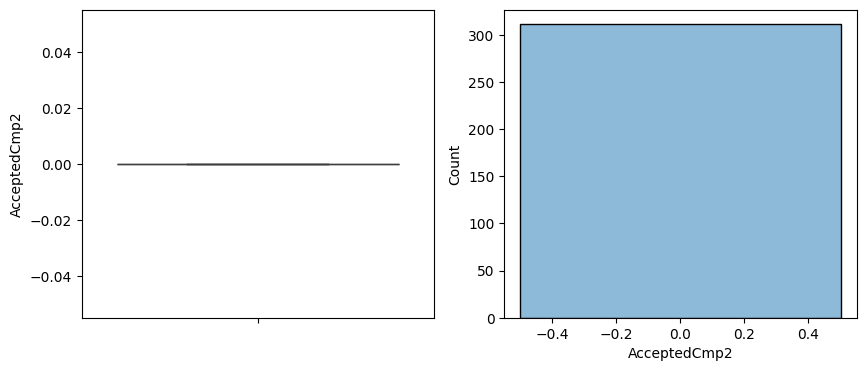

Removing AcceptedCmp2
The Response lowlimit is: 0.0 uplimit is: 0.0
The Response variable has 5 outliers 



<Figure size 640x480 with 0 Axes>

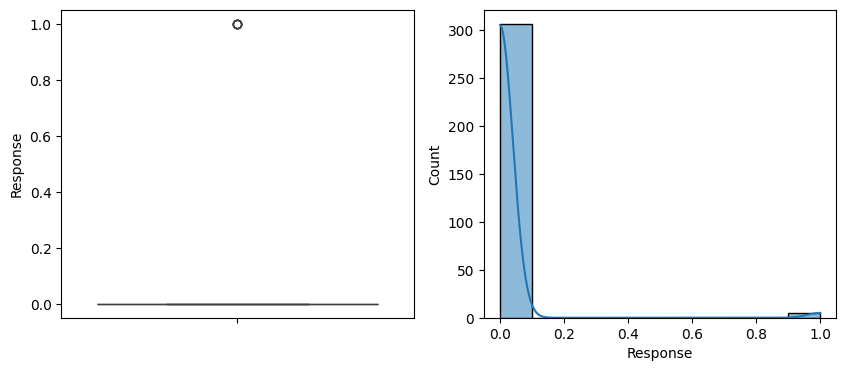

Removing Response
The Complain lowlimit is: 0.0 uplimit is: 0.0
The Complain variable has 6 outliers 



<Figure size 640x480 with 0 Axes>

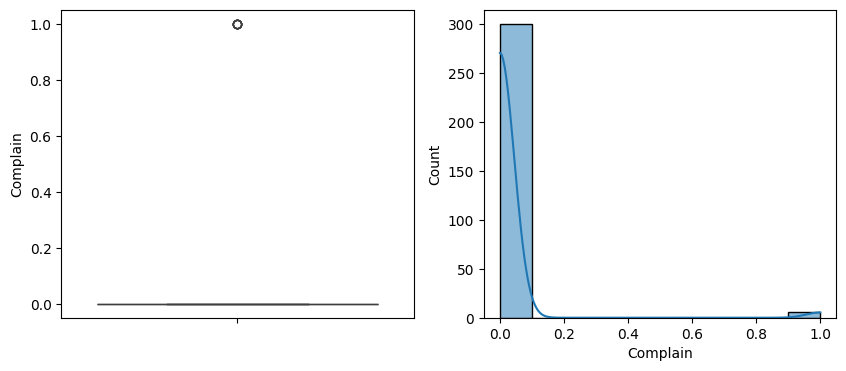

Removing Complain
The Total_Children lowlimit is: -0.5 uplimit is: 3.5
The Total_Children variable has no outliers 



<Figure size 640x480 with 0 Axes>

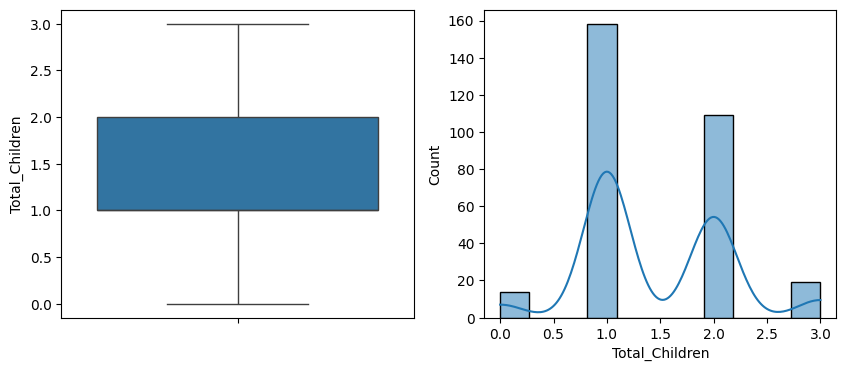

Removing Total_Children
The Age lowlimit is: 24.625000000000004 uplimit is: 73.225
The Age variable has 13 outliers 



<Figure size 640x480 with 0 Axes>

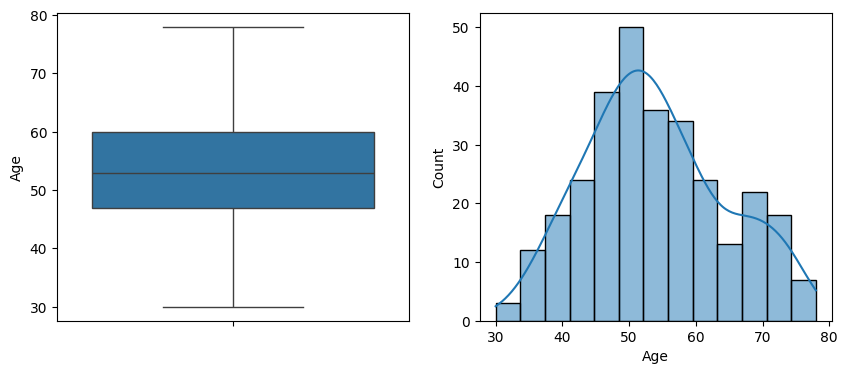

Removing Age
The Total_Spending lowlimit is: -16.5 uplimit is: 75.5
The Total_Spending variable has 11 outliers 



<Figure size 640x480 with 0 Axes>

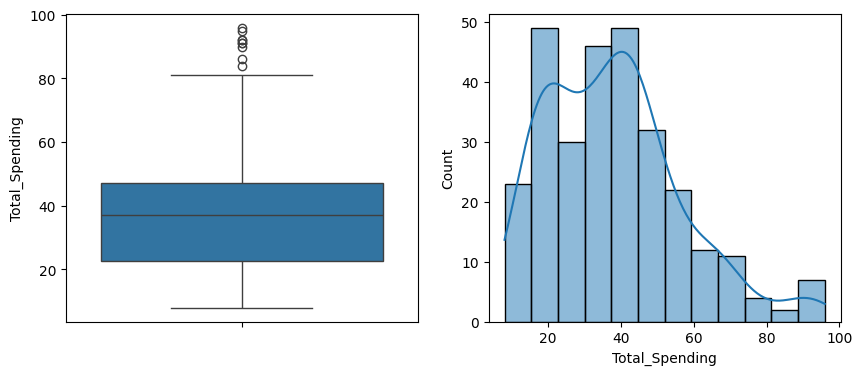

Removing Total_Spending
The Total_Purchases lowlimit is: 1.5 uplimit is: 5.5
The Total_Purchases variable has 10 outliers 



<Figure size 640x480 with 0 Axes>

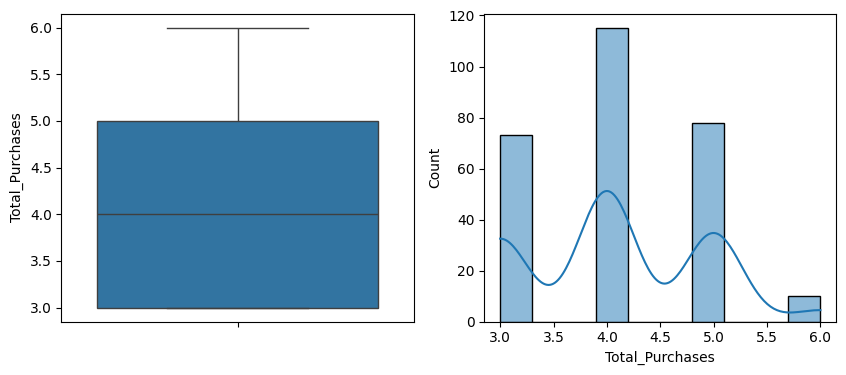

Removing Total_Purchases


<Figure size 640x480 with 0 Axes>

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f'numeric_columns: {numeric_columns}')
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f'cate_cols: {categorical_cols}')

df_cleaned = has_outliers(df, numeric_columns, True, True)
# has_outliers(df, numeric_columns, False, False)

In [ ]:
higher_outliers = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total_Purchases']

for col in higher_outliers:
    low_limit, up_limit = outliers_threshold(df_cleaned, col, 0.05, 0.55)
    print(f'The {col} lowlimit is: {low_limit} uplimit is: {up_limit}')
    df_cleaned = df_cleaned[(df_cleaned[col] <= up_limit) & (df_cleaned[col] >= low_limit)]

The MntWines lowlimit is: -17.5 uplimit is: 34.5
The MntFruits lowlimit is: -1.5 uplimit is: 2.5
The MntMeatProducts lowlimit is: -7.0 uplimit is: 17.0
The MntFishProducts lowlimit is: -3.0 uplimit is: 5.0
The MntSweetProducts lowlimit is: 0.0 uplimit is: 0.0
The MntGoldProds lowlimit is: -3.0 uplimit is: 5.0
The Total_Purchases lowlimit is: 1.5 uplimit is: 5.5


From the above plots we can confirm the outliers present, and Implemented outlier treatment as needed

['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Total_Children', 'Age', 'Total_Spending', 'Total_Purchases']


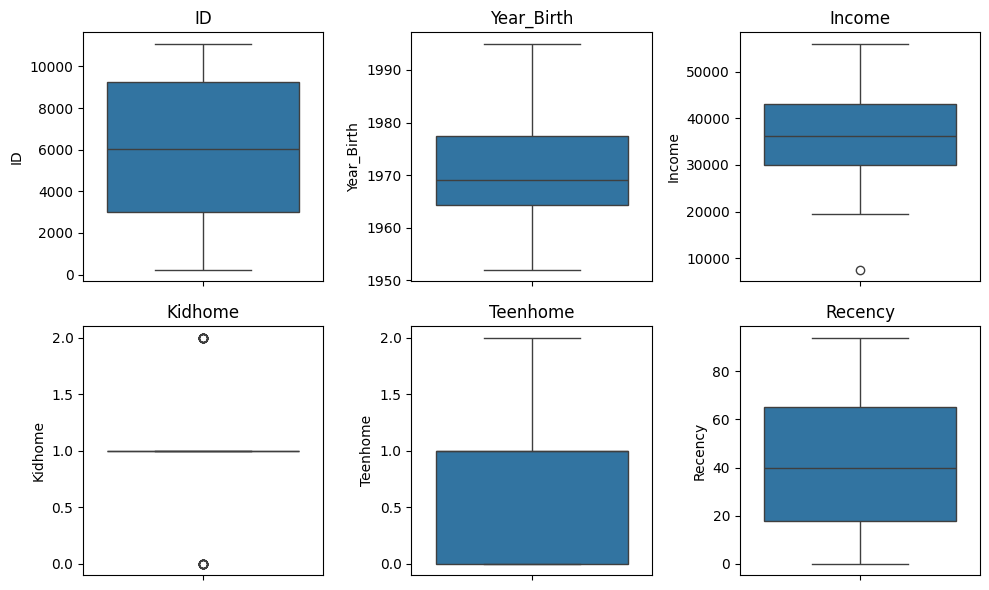

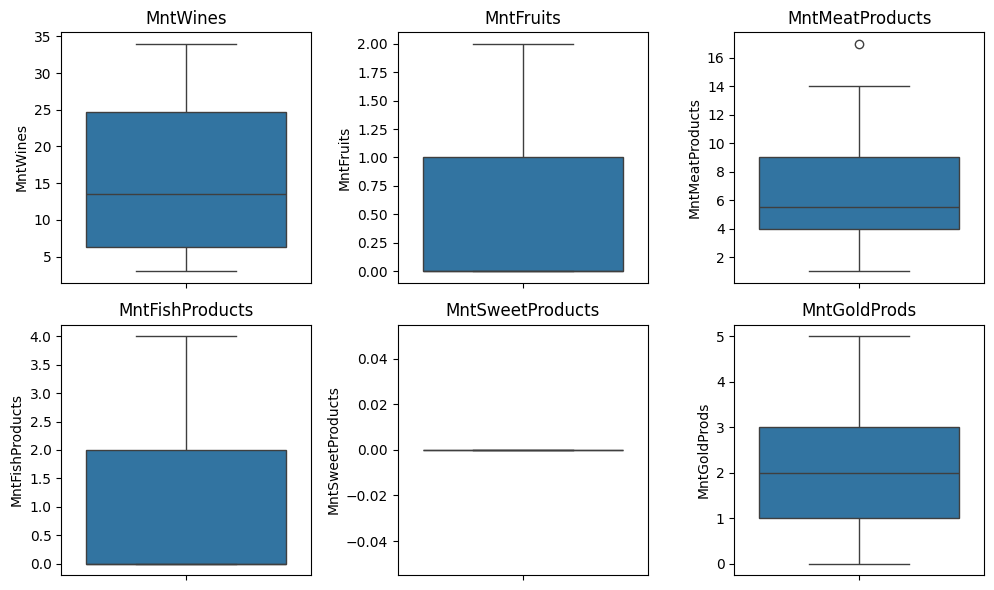

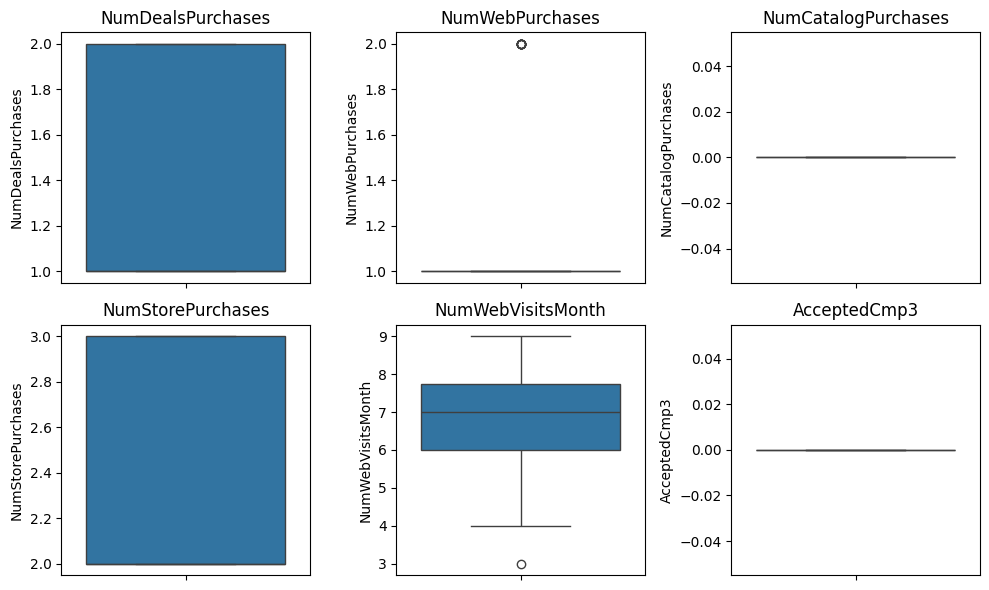

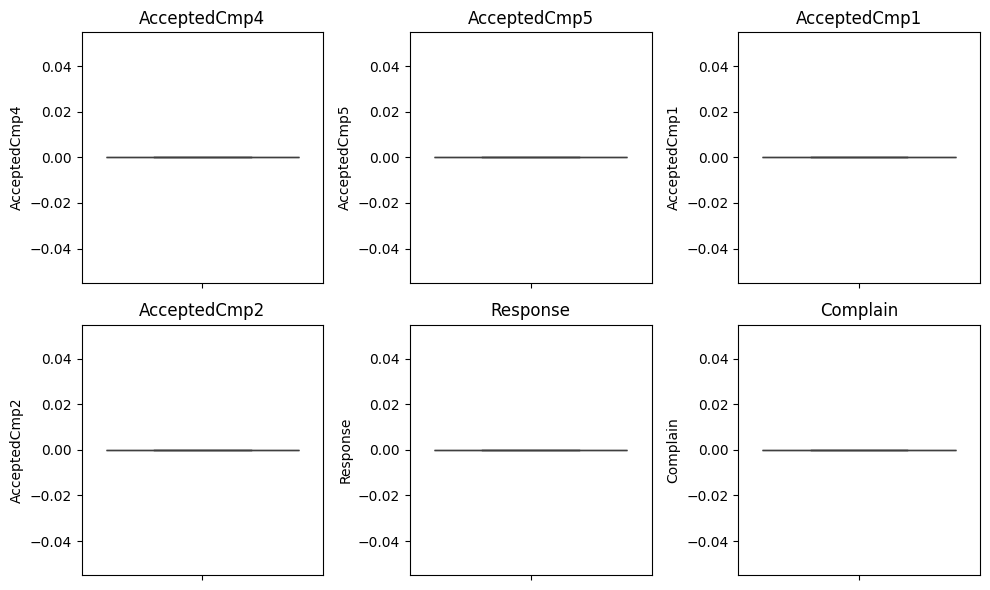

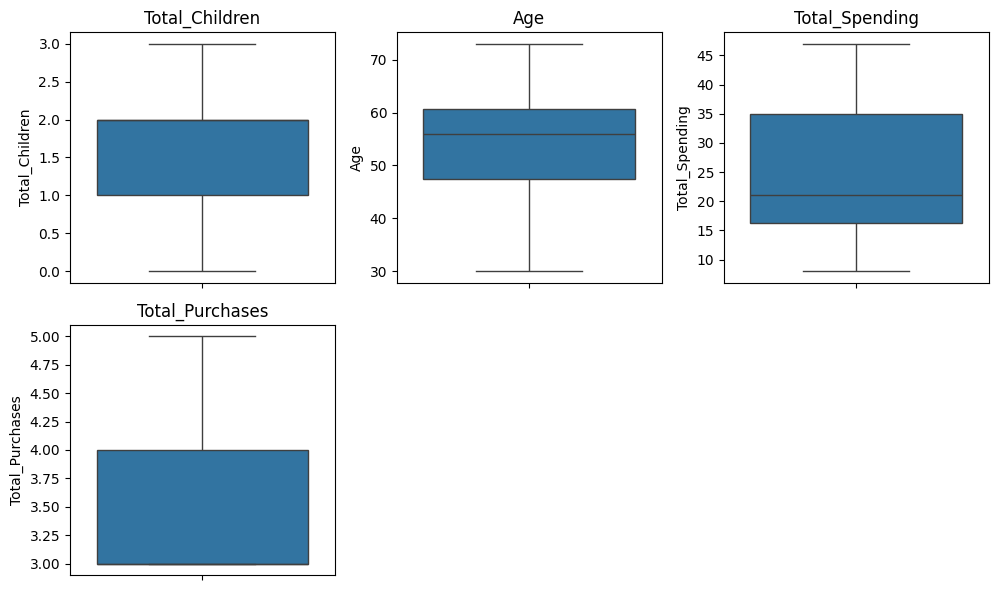

In [ ]:
#Check Plot outlier after cleaned Data
print(numeric_columns)

# Create multiple figures to display all box plots
num_cols = len(numeric_columns)
plots_per_figure = 6
num_figures = (num_cols + plots_per_figure - 1) // plots_per_figure

for i in range(num_figures):
    plt.figure(figsize=(10, 6))
    start_index = i * plots_per_figure
    end_index = min((i + 1) * plots_per_figure, num_cols)
    cols_to_plot = numeric_columns[start_index:end_index]

    for j, col in enumerate(cols_to_plot):
        plt.subplot(2, 3, j + 1)
        sns.boxplot(df_cleaned[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

### Task 5
Apply ordinal and one-hot encoding based on the various types of categorical variables.

In [ ]:
print(cate_cols)
print(f'Unique values in Education: {df["Education"].unique()}')
print(f'Unique values in Marital_Status: {df["Marital_Status"].unique()}')
print(f'Unique values in Country: {df["Country"].unique()}')

# Performing ordinal encoding for Education and Marital Status
education_mapping = {'Graduation': 1, 'PhD': 2, 'Master': 3, 'Basic': 4, '2n Cycle': 5}
marital_status_mapping = {'Married': 1, 'Single': 2, 'Together': 3, 'Divorced': 4, 'Widow': 5, 'Unusual': 6}

df['Marital_Status'] = df['Marital_Status'].map(marital_status_mapping)
df['Education'] = df['Education'].map(education_mapping)

# Display the first few rows to show the changes
display(df.head())

['Education', 'Marital_Status', 'Country']
Unique values in Education: ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
Unique values in Marital_Status: ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'Unusual']
Unique values in Country: ['SP' 'CA' 'US' 'AUS' 'GER' 'IND' 'SA' 'ME']


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Children,Age,Total_Spending,Total_Purchases
0,1826,1970,1,4,84835.0,0,0,2014-06-16,0,189,...,0,0,0,1,0,SP,0,55,1190,14
1,1,1961,1,2,57091.0,0,0,2014-06-15,0,464,...,0,0,1,1,0,CA,0,64,577,17
2,10476,1958,1,1,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,US,1,67,251,10
3,1386,1967,1,3,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,AUS,2,58,11,3
4,5371,1989,1,2,21474.0,1,0,2014-04-08,0,6,...,0,0,0,1,0,SP,1,36,91,6


In [ ]:
# Performing one-hot encoding for the 'Country' column
df = pd.get_dummies(df, columns=['Country'], drop_first=True)

# Display the first few rows to show the changes
display(df.head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Age,Total_Spending,Total_Purchases,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,1826,1970,1,4,84835.0,0,0,2014-06-16,0,189,...,55,1190,14,False,False,False,False,False,True,False
1,1,1961,1,2,57091.0,0,0,2014-06-15,0,464,...,64,577,17,True,False,False,False,False,False,False
2,10476,1958,1,1,67267.0,0,1,2014-05-13,0,134,...,67,251,10,False,False,False,False,False,False,True
3,1386,1967,1,3,32474.0,1,1,2014-05-11,0,10,...,58,11,3,False,False,False,False,False,False,False
4,5371,1989,1,2,21474.0,1,0,2014-04-08,0,6,...,36,91,6,False,False,False,False,False,True,False


### Task 6 Heatmap
Generate a heatmap to illustrate the correlation between different pairs of
variables

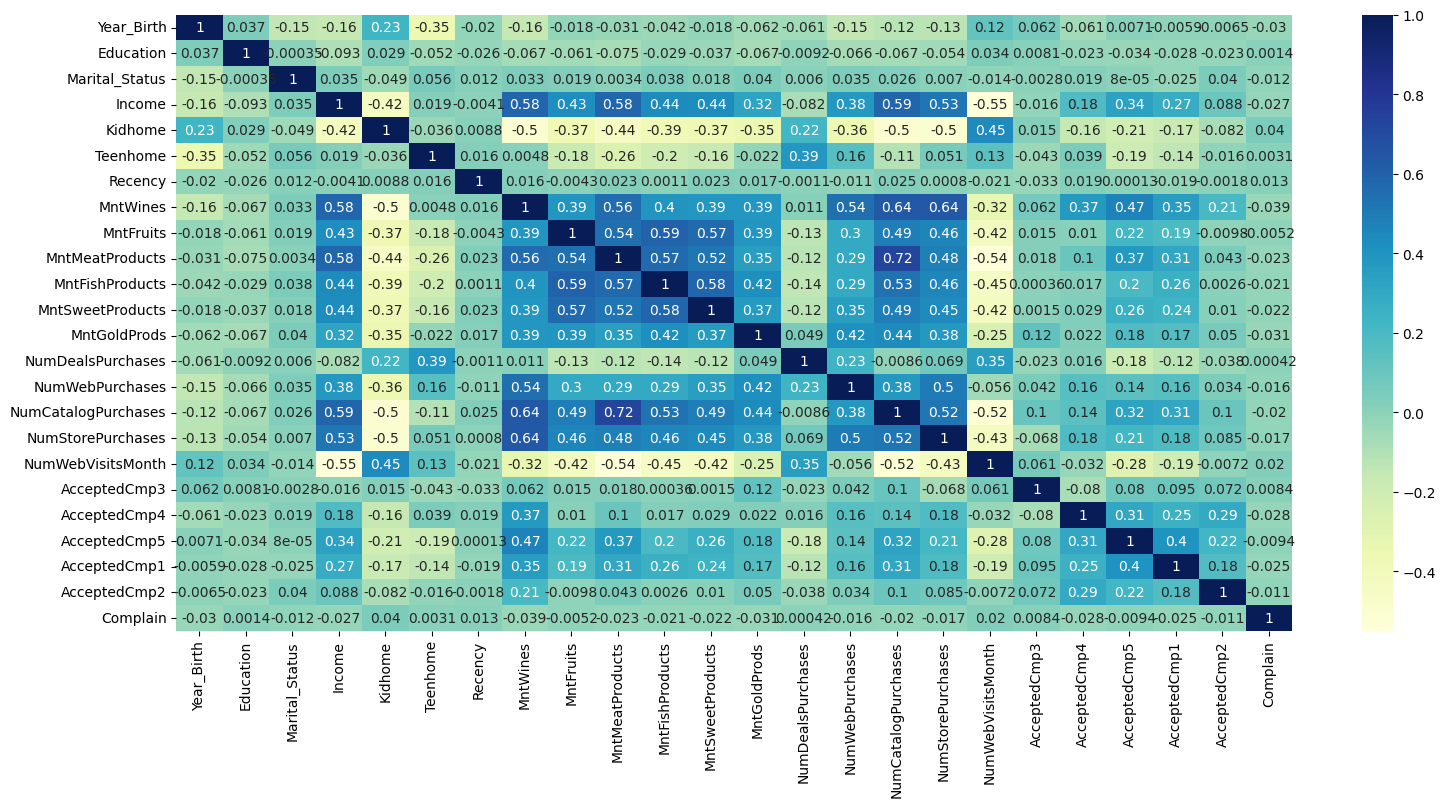

In [ ]:
cols = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency',
        'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
        'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
        'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain']

# Compute correlation matrix
co_mtx = df[cols].corr(numeric_only=True)

# Print correlation matrix
# print(co_mtx)
plt.figure(figsize=(18, 8))
# Plot correlation heatmap
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)

# Display heatmap
plt.show()

# Test the following hypotheses:

a. Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences.

b. Customers with children likely experience time constraints, making online shopping a more convenient option.

c. Sales at physical stores may face the risk of cannibalization by alternative distribution channels.

d. Does the United States significantly outperform the rest of the world in total purchase volumes?

##Analyze hypothesis a

Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences

Investigae the relationship between Age and NumStorePurchases

## Analyze hypothesis a

### Subtask:
Investigate the relationship between 'Age' and 'NumStorePurchases'.


**Reasoning**:
Calculate and print the correlation between 'Age' and 'NumStorePurchases' and then create and display a scatter plot to visualize the relationship.



Correlation between Age and NumStorePurchases: 0.12827205559380092


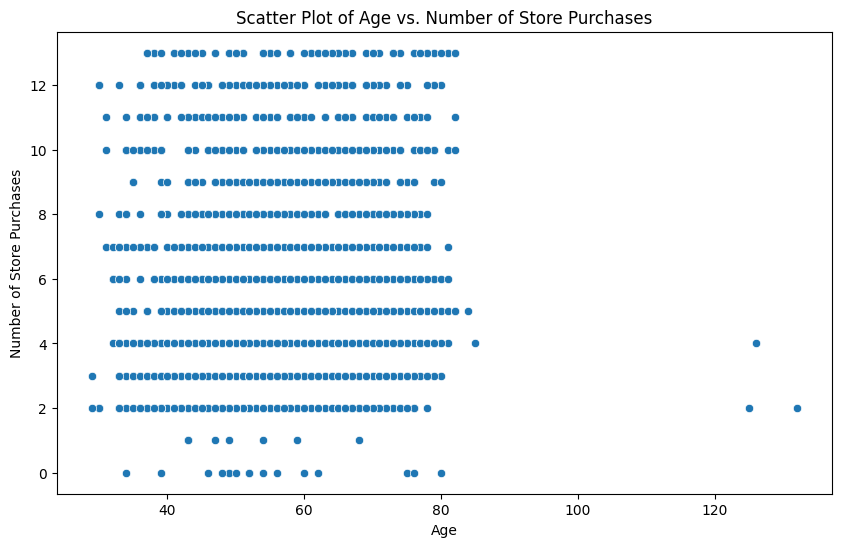

In [ ]:
correlation = df['Age'].corr(df['NumStorePurchases'])
print(f"Correlation between Age and NumStorePurchases: {correlation}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='NumStorePurchases', data=df)
plt.title('Scatter Plot of Age vs. Number of Store Purchases')
plt.xlabel('Age')
plt.ylabel('Number of Store Purchases')
plt.show()

## Analyze hypothesis b

### Subtask:
Examine the relationship between 'Total_Children' and 'NumWebPurchases'.


**Reasoning**:
Calculate and print the correlation between 'Total_Children' and 'NumWebPurchases', then generate and display a scatter plot to visualize this relationship with appropriate labels and a title.



Correlation between Total_Children and NumWebPurchases: -0.1463609934277097


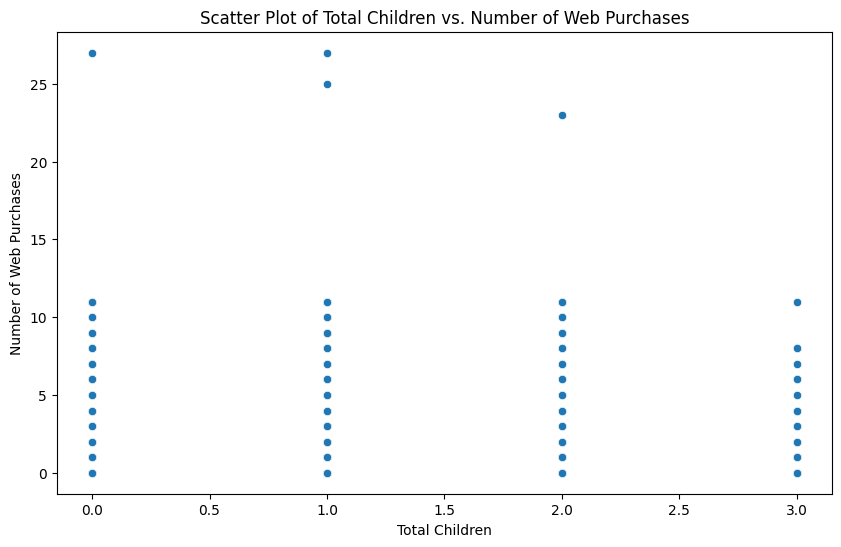

In [ ]:
correlation = df['Total_Children'].corr(df['NumWebPurchases'])
print(f"Correlation between Total_Children and NumWebPurchases: {correlation}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Children', y='NumWebPurchases', data=df)
plt.title('Scatter Plot of Total Children vs. Number of Web Purchases')
plt.xlabel('Total Children')
plt.ylabel('Number of Web Purchases')
plt.show()

## Analyze hypothesis c

### Subtask:
Compare 'NumStorePurchases' with 'NumWebPurchases' and 'NumCatalogPurchases'.


**Reasoning**:
Calculate the mean of the specified purchase types and then create a bar plot to visualize and compare these means, including labels and a title for clarity.



Mean Store Purchases: 5.790178571428571
Mean Web Purchases: 4.084821428571429
Mean Catalog Purchases: 2.6620535714285714


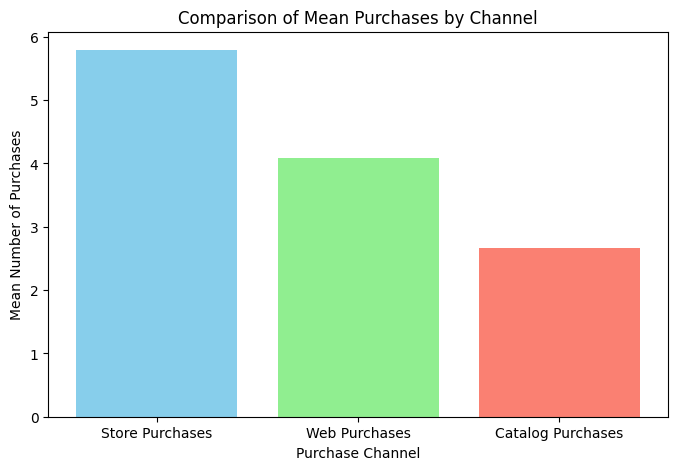

In [ ]:
# Calculate the mean of the purchase columns
mean_store_purchases = df['NumStorePurchases'].mean()
mean_web_purchases = df['NumWebPurchases'].mean()
mean_catalog_purchases = df['NumCatalogPurchases'].mean()

# Print the calculated means
print(f'Mean Store Purchases: {mean_store_purchases}')
print(f'Mean Web Purchases: {mean_web_purchases}')
print(f'Mean Catalog Purchases: {mean_catalog_purchases}')

# Create a bar plot
purchase_means = {
    'Store Purchases': mean_store_purchases,
    'Web Purchases': mean_web_purchases,
    'Catalog Purchases': mean_catalog_purchases
}

plt.figure(figsize=(8, 5))
plt.bar(purchase_means.keys(), purchase_means.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Purchase Channel')
plt.ylabel('Mean Number of Purchases')
plt.title('Comparison of Mean Purchases by Channel')
plt.show()

## Analyze hypothesis d

### Subtask:
Compare the total purchase volumes of the United States with the rest of the world.


**Reasoning**:
Calculate the total purchases for US and Rest of the world, then visualize the comparison with a bar plot.



Total Purchases in the United States: 1473
Total Purchases in the Rest of the World: 26610


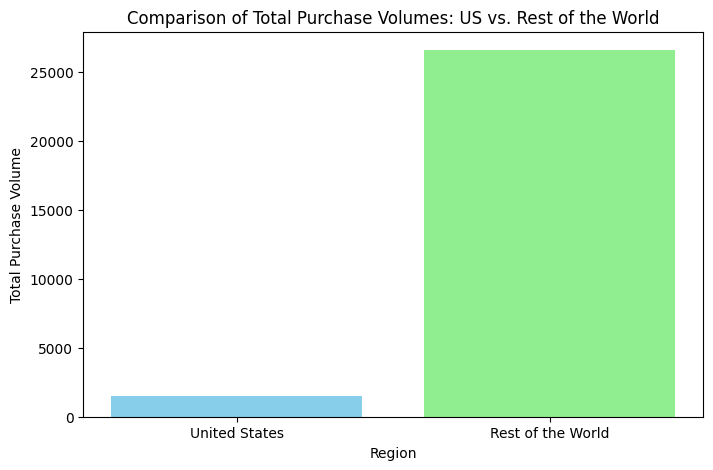

In [ ]:
# # Create subsets for the United States and the rest of the world
# df_us = df[df['Country_US'] == True]
# df_rest_of_world = df[df['Country_US'] == False]

# # Calculate the sum of 'Total_Purchases' for each subset
# total_purchases_us = df_us['Total_Purchases'].sum()
# total_purchases_rest_of_world = df_rest_of_world['Total_Purchases'].sum()

# Calculate the sum of 'Total_Purchases' for each subset
total_purchases_us = np.where(df['Country_US'] == True, df['Total_Purchases'], 0).sum()
total_purchases_rest_of_world = np.where(df['Country_US'] == False, df['Total_Purchases'], 0).sum()

# Print the total purchase volumes
print(f'Total Purchases in the United States: {total_purchases_us}')
print(f'Total Purchases in the Rest of the World: {total_purchases_rest_of_world}')

# Create a bar plot to compare the total purchase volumes
purchase_volumes = {
    'United States': total_purchases_us,
    'Rest of the World': total_purchases_rest_of_world
}

plt.figure(figsize=(8, 5))
plt.bar(purchase_volumes.keys(), purchase_volumes.values(), color=['skyblue', 'lightgreen'])
plt.xlabel('Region')
plt.ylabel('Total Purchase Volume')
plt.title('Comparison of Total Purchase Volumes: US vs. Rest of the World')
plt.show()

## Summarize findings

### Subtask:
Present the findings for each hypothesis.


**Reasoning**:
Present the findings for each hypothesis based on the previous analysis.



In [ ]:
print("Hypothesis a: Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences.")
print(f"Analysis of Hypothesis a: The correlation between Age and NumStorePurchases is approximately {df['Age'].corr(df['NumStorePurchases']):.3f}. This weak positive correlation suggests a slight tendency for older individuals to make more in-store purchases, which weakly supports the hypothesis.")
print("-" * 50)

print("Hypothesis b: Customers with children likely experience time constraints, making online shopping a more convenient option.")
print(f"Analysis of Hypothesis b: The correlation between Total_Children and NumWebPurchases is approximately {df['Total_Children'].corr(df['NumWebPurchases']):.3f}. This weak negative correlation suggests that as the number of children increases, the number of web purchases tends to slightly decrease, which refutes the hypothesis.")
print("-" * 50)

print("Hypothesis c: Sales at physical stores may face the risk of cannibalization by alternative distribution channels.")
mean_store_purchases = df['NumStorePurchases'].mean()
mean_web_purchases = df['NumWebPurchases'].mean()
mean_catalog_purchases = df['NumCatalogPurchases'].mean()
print(f"Analysis of Hypothesis c: The mean number of purchases are: Store Purchases = {mean_store_purchases:.2f}, Web Purchases = {mean_web_purchases:.2f}, Catalog Purchases = {mean_catalog_purchases:.2f}. Store purchases are the most frequent, followed by web and then catalog. While other channels exist, the data does not strongly suggest cannibalization based on purchase counts alone.")
print("-" * 50)

print("Hypothesis d: Does the United States significantly outperform the rest of the world in total purchase volumes?")
df_us = df[df['Country_US'] == True]
df_rest_of_world = df[df['Country_US'] == False]
total_purchases_us = df_us['Total_Purchases'].sum()
total_purchases_rest_of_world = df_rest_of_world['Total_Purchases'].sum()
print(f"Analysis of Hypothesis d: The total purchase volume in the United States is {total_purchases_us} and in the Rest of the World is {total_purchases_rest_of_world}. The Rest of the World has a significantly higher total purchase volume, which refutes the hypothesis that the United States significantly outperforms the rest of the world.")

Hypothesis a: Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences.
Analysis of Hypothesis a: The correlation between Age and NumStorePurchases is approximately 0.128. This weak positive correlation suggests a slight tendency for older individuals to make more in-store purchases, which weakly supports the hypothesis.
--------------------------------------------------
Hypothesis b: Customers with children likely experience time constraints, making online shopping a more convenient option.
Analysis of Hypothesis b: The correlation between Total_Children and NumWebPurchases is approximately -0.146. This weak negative correlation suggests that as the number of children increases, the number of web purchases tends to slightly decrease, which refutes the hypothesis.
--------------------------------------------------
Hypothesis c: Sales at physical stores may face the risk of cannibalization by 

## Summary:

### Data Analysis Key Findings

*   Hypothesis a (Older individuals and in-store purchases): A weak positive correlation (0.128) between age and the number of in-store purchases provides weak support for the hypothesis.
*   Hypothesis b (Customers with children and online shopping): A weak negative correlation (-0.146) between the number of children and web purchases refutes the hypothesis.
*   Hypothesis c (Cannibalization of store sales): Store purchases have the highest mean number (5.79) compared to web (4.08) and catalog (2.66) purchases. The data does not strongly suggest cannibalization based on purchase counts alone.
*   Hypothesis d (US vs. Rest of the World purchase volume): The total purchase volume in the United States (\$1473) is significantly lower than in the Rest of the World (\$26610), refuting the hypothesis that the US significantly outperforms the rest of the world.
